## Deconvolution with redlionfish

This example shows how to do deconvolution with the RedLionfish library (https://github.com/rosalindfranklininstitute/RedLionfish)

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
import RedLionfishDeconv as rl
from tnia.plotting.projections import show_xyz_max, show_xy_zy_max

## Load Images and PSF

You can change this to point to your own images...

In [4]:
dir_name='D:\\images\\'
#dir_name='/home/bnorthan/Images/'

im_name = dir_name+'tnia-python-images/deconvolution/microtubules/input.tif'
psf_name = dir_name+'tnia-python-images/deconvolution/microtubules/psf.tif'
truth_name = dir_name+'tnia-python-images/deconvolution/microtubules/ground-truth.tif'

In [5]:
im=imread(im_name)
psf=imread(psf_name)
truth=imread(truth_name)

In [6]:
im.shape

(128, 256, 512)

In [7]:
midy=int(psf.shape[1]/2)
midx=int(psf.shape[2]/2)
xy=32
psf_=psf[:,midy-xy:midy+xy,midx-xy:midx+xy]
psf_.shape

(128, 64, 64)

In [21]:
niter=100
decon=rl.doRLDeconvolutionFromNpArrays(im, psf, niter=niter, method='gpu', resAsUint8=False )

C:\Users\bnort\miniconda3\envs\decon-napari\lib\site-packages\cycler.py:389: RuntimeWarning: coroutine 'get_msg' was never awaited
  for k in keys:


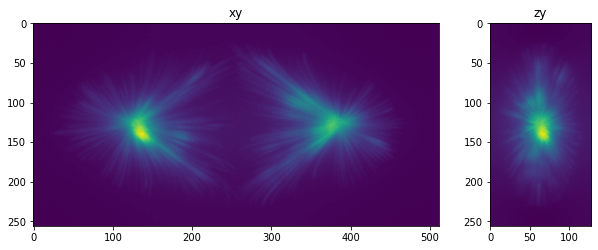

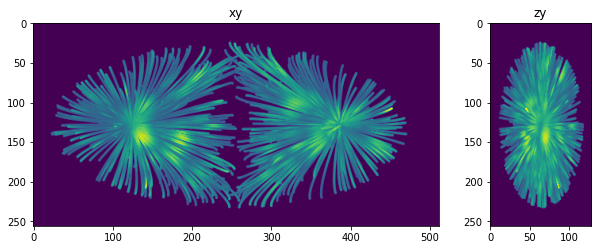

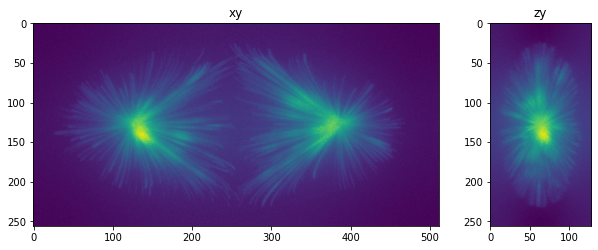

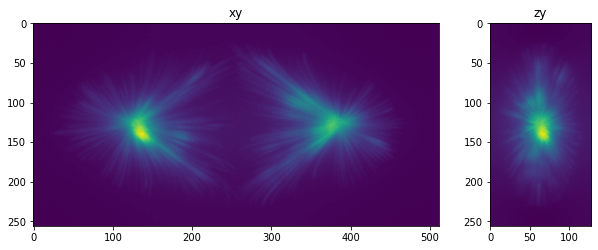

In [22]:
show_xy_zy_max(truth,figsize=(10,7))
fig=show_xy_zy_max(im,figsize=(10,7))
show_xy_zy_max(decon,figsize=(10,7))

In [16]:
import napari
viewer=napari.Viewer()
viewer.add_image(im)
viewer.add_image(truth)
viewer.add_image(decon)

C:\Users\bnort\miniconda3\envs\decon-napari\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)
ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "C:\Users\bnort\miniconda3\envs\decon-napari\lib\site-packages\zmq\eventloop\zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\bnort\miniconda3\envs\decon-napari\lib\site-packages\jupyter_client\threaded.py", line 122, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "C:\Users\bnort\miniconda3\envs\decon-napari\lib\asyncio\base_events.py", line 623, in ru

<Image layer 'decon' at 0x26d434b8f10>